In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
%matplotlib inline

In [3]:
df = pd.read_csv('coalv2.csv')
df.head()

,moistr,volmat,fixedc,ash,hydrgn,carbon,nitrgn,oxygen,sulfur,gcv
0,6.98,33.02,57.42,2.58,5.14,71.80,1.13,18.91,0.44,12312
1,11.15,26.39,58.32,4.14,5.05,66.71,1.40,22.10,0.60,11290
2,2.38,29.88,54.64,13.10,4.66,69.69,1.25,6.07,5.23,12674
3,3.38,28.61,40.39,27.62,4.30,55.02,1.15,6.78,5.13,10130
4,10.67,27.92,54.50,6.91,5.43,70.17,1.54,14.80,1.15,12559


In [4]:
df = df.iloc[:5000, ]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   moistr  5000 non-null   float64
 1   volmat  5000 non-null   float64
 2   fixedc  5000 non-null   float64
 3   ash     5000 non-null   float64
 4   hydrgn  5000 non-null   float64
 5   carbon  5000 non-null   float64
 6   nitrgn  5000 non-null   float64
 7   oxygen  5000 non-null   float64
 8   sulfur  5000 non-null   float64
 9   gcv     5000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 390.8 KB


In [5]:
# selecting features and label
X = df.iloc[:, :-1]  # features
y = df.iloc[:,-1]  # target

In [6]:
[X.shape, y.shape]

[(5000, 9), (5000,)]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True, random_state=324)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
input = tf.keras.layers.Input(shape=X_train_scaled.shape[1:])
x = tf.keras.layers.Dense(10, activation="relu")(input)
x = tf.keras.layers.Dense(8, activation="relu")(x)
x = tf.keras.layers.Dense(5, activation="relu")(x)

output = tf.keras.layers.Dense(1)(x)

In [10]:

# function to convert seconds to into hours, minutes and seconds
# this function is used to measure the running time of any model
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d:%02d" % (hour, minutes, seconds)

In [12]:
import time
model = tf.keras.Model(inputs=[input], outputs=[output])

model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

start = time.time() # starting of the time

history = model.fit(x=X_train_scaled, y=y_train,
                    validation_split=0.2,
                    batch_size=10,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                        monitor='val_loss',
                        patience=15
                    )],
                    epochs=150,
                    shuffle=True,
                    verbose=2)

end = time.time() # ending of the time
print('run_time:', convert(end - start), 'h:m:s')

Epoch 1/150
280/280 - 6s - loss: 136758544.0000 - mse: 136758544.0000 - val_loss: 137702928.0000 - val_mse: 137702928.0000 - 6s/epoch - 20ms/step
Epoch 2/150
280/280 - 1s - loss: 131834816.0000 - mse: 131834816.0000 - val_loss: 124473160.0000 - val_mse: 124473160.0000 - 987ms/epoch - 4ms/step
Epoch 3/150
280/280 - 1s - loss: 101926880.0000 - mse: 101926880.0000 - val_loss: 76125304.0000 - val_mse: 76125304.0000 - 980ms/epoch - 3ms/step
Epoch 4/150
280/280 - 1s - loss: 47380828.0000 - mse: 47380828.0000 - val_loss: 26307538.0000 - val_mse: 26307538.0000 - 944ms/epoch - 3ms/step
Epoch 5/150
280/280 - 1s - loss: 17909134.0000 - mse: 17909134.0000 - val_loss: 13715763.0000 - val_mse: 13715763.0000 - 824ms/epoch - 3ms/step
Epoch 6/150
280/280 - 1s - loss: 12395542.0000 - mse: 12395542.0000 - val_loss: 10952612.0000 - val_mse: 10952612.0000 - 911ms/epoch - 3ms/step
Epoch 7/150
280/280 - 1s - loss: 10387771.0000 - mse: 10387771.0000 - val_loss: 9311626.0000 - val_mse: 9311628.0000 - 859ms/epo

In [13]:
#result = pd.DataFrame(model.summary())

## saving the model architecture to a text file

In [14]:
# saving the model architecture to a text file
# from contextlib import redirect_stdout

# with open('modelsummary.txt', 'w') as f:
#     with redirect_stdout(f):
#         model.summary()

In [15]:
hist=pd.DataFrame (history.history)
hist.to_csv('history_of_ann.csv')
hist.head()

,loss,mse,val_loss,val_mse
0,136758544.0,136758544.0,137702928.0,137702928.0
1,131834816.0,131834816.0,124473160.0,124473160.0
2,101926880.0,101926880.0,76125304.0,76125304.0
3,47380828.0,47380828.0,26307538.0,26307538.0
4,17909134.0,17909134.0,13715763.0,13715763.0


In [16]:
len(hist)

120

In [17]:
hist.describe()

,loss,mse,val_loss,val_mse
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,4.394348e+06,4.394348e+06,3.866694e+06,3.866694e+06
std,1.994039e+07,1.994039e+07,1.829529e+07,1.829529e+07
min,1.325302e+04,1.325302e+04,2.470183e+04,2.470183e+04
25%,1.369392e+04,1.369392e+04,2.534054e+04,2.534054e+04
50%,1.579819e+04,1.579819e+04,2.770782e+04,2.770782e+04
75%,2.468089e+05,2.468089e+05,2.374833e+05,2.374833e+05
max,1.367585e+08,1.367585e+08,1.377029e+08,1.377029e+08


In [18]:
# hist.plot(figsize=(8,5))
# plt.grid(True)
# #plt.gca().set_ylim(0,1)
# plt.show()

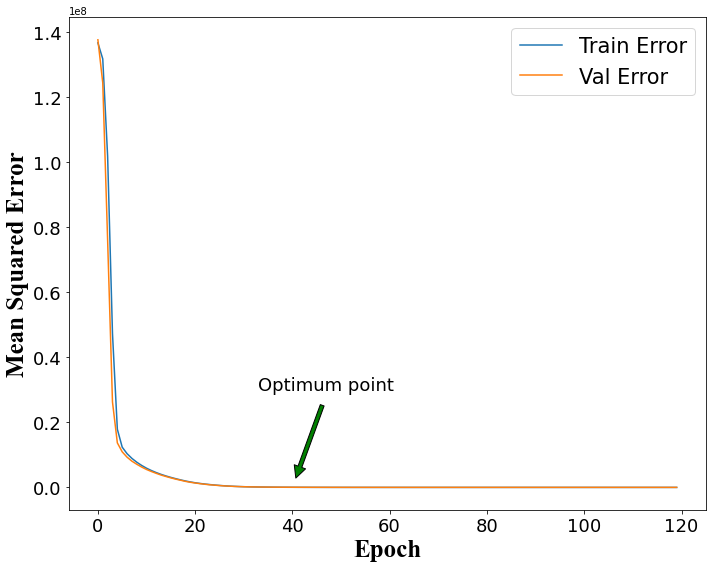

In [25]:

def plot_history (history):

    hist=pd.DataFrame (history.history)
    hist['epoch'] = history.epoch
    
    #plt.style.use('ggplot')
    
    # plt.figure(figsize=(10, 6))
    # plt.xlabel('Epoch')
    # plt.ylabel('Mean Absolute Error')
    # plt.plot(hist['epoch'], hist['mae'], label = 'Train_Error')
    # plt.plot(hist['epoch'], hist['val_mae'], label='Val_Error')
    # plt.legend()
    #plt.ylim ([0,5])

    plt.figure(figsize=(10, 8))
    plt.xlabel('Epoch', fontsize=25, fontname='Times New Roman', fontweight='bold')
    plt.ylabel('Mean Squared Error', fontsize=25, fontname='Times New Roman', fontweight='bold')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.legend(fontsize=21)
    plt.annotate('Optimum point', xy=(40, 1.307777e+04), xytext=(33, 0.3e+08),
                arrowprops = dict(facecolor ='green',shrink = 0.1), fontsize=18)
    #plt.ylim([0,20])
    plt.tight_layout()

plot_history(history)
plt.savefig('ann_training_state_final.png', dpi=300)


In [20]:
#model.save('trained_ann_model32.h6')
#scaler.save('ann_scaler1.h5')
#model = keras.models.load_model('trained_ann_model.h5')


In [21]:
pred = model.predict(x=X_test_scaled, batch_size=11, verbose=0)

In [22]:
# ytest : series
#min(abs(pred.to_numpy() - y_test.to_numpy()))

In [23]:
np.array(pred)
pred = pred.reshape(1, -1)
pred = pred.squeeze()
pred = pd.Series(pred, name='gcv')


# Evaluation Metrics for testing set

In [24]:

# explained_variance
from sklearn.metrics import explained_variance_score
explained_variance = explained_variance_score(y_test, pred)

# r2_score
from sklearn.metrics import r2_score
r2 = r2_score(y_test,pred)

# max_error
from sklearn.metrics import max_error
max_error = max_error(y_test, pred)

# min error
min_error = min(abs(pred.to_numpy() - y_test.to_numpy()))

# mean absolute error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, pred)

# mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, pred)

# mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, pred)


metrics = {
		'Performance_metrics': ['R2', 'MSE', 'Explained Variance',  'Max error', 'Min error', 'MAE',  'MAPE'],
		'15:10:05': [r2, MSE, explained_variance,  max_error, min_error, MAE, MAPE]
	}

performance_metrics = pd.DataFrame(metrics)
performance = performance_metrics.transpose()

print(performance)


                            0             1                   2            3  \
Performance_metrics        R2           MSE  Explained Variance    Max error   
15:10:05             0.997199  14317.783509            0.997253  1452.828125   

                             4          5         6  
Performance_metrics  Min error        MAE      MAPE  
15:10:05              0.004883  83.298394  0.007939  


In [1457]:
performance.to_csv('ann_performance32.csv')